## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df=pd.read_csv("F:\Internships Assignments\Wysa\raw_train.csv")

In [3]:
df.head(10)

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5  @teachntech00 New iPad Apps For #SpeechTherapy...   
6                                                NaN   
7  #SXSW is just starting, #CTIA is around the co...   
8  Beautifully smart and simple idea RT @madebyma...   
9  Counting down the days to #sxsw plus strong Ca...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   
5                             NaN   
6                             NaN   
7                         Android   
8              iPad or iPhone App   
9                           Apple   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  
5                 No emotion toward brand or product  
6                 No emotion toward brand or product  
7                                   Positive emotion  
8                                   Positive emotion  
9                                   Positive emotion

In [4]:
df.shape

(8589, 3)

In [5]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [6]:
# Renaming the column names 

df.columns=['text','source','review']

In [7]:
df.head()

text              source  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

             review  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

In [8]:
df['review'].value_counts()

review
No emotion toward brand or product    5389
Positive emotion                      2672
Negative emotion                       519
I can't tell                             9
Name: count, dtype: int64

In [9]:
# Replacing the text in review with simplified versions

df['review']=df['review'].str.replace("No emotion toward brand or product","Neutral")
df['review']=df['review'].str.replace("I can't tell","Neutral")

df['review'].value_counts()

review
Neutral             5398
Positive emotion    2672
Negative emotion     519
Name: count, dtype: int64

## EDA

<Axes: xlabel='review', ylabel='count'>

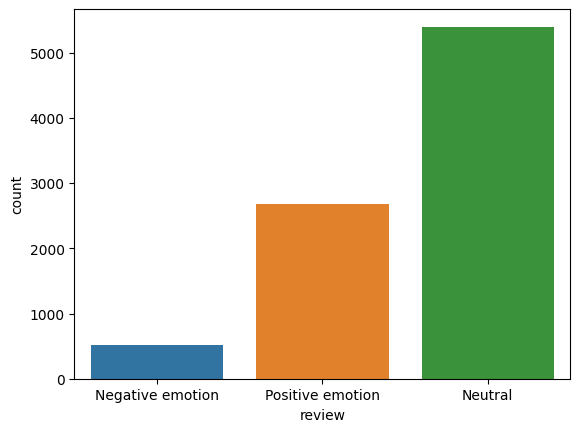

In [10]:
sns.countplot(x='review', data=df)

There is lot of class imbalance in this data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'iPhone'),
  Text(1, 0, 'iPad or iPhone App'),
  Text(2, 0, 'iPad'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Android'),
  Text(5, 0, 'Apple'),
  Text(6, 0, 'Android App'),
  Text(7, 0, 'Other Google product or service'),
  Text(8, 0, 'Other Apple product or service')])

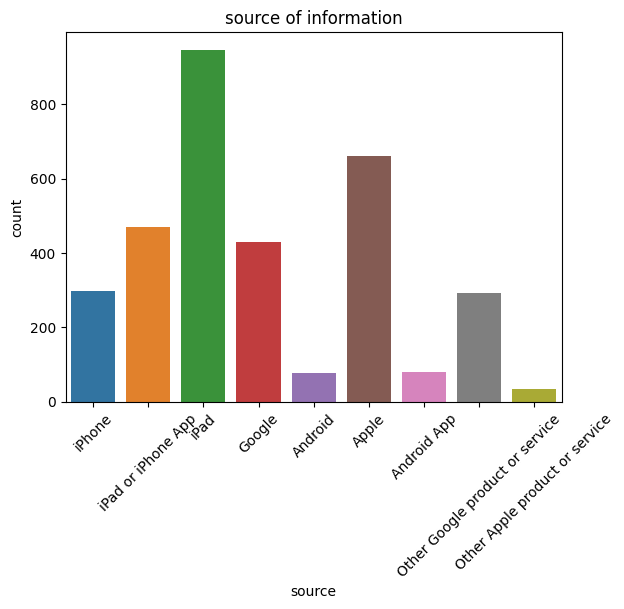

In [11]:
sns.countplot(x='source', data=df)
plt.title("source of information")
plt.xticks(rotation=45)

There are lot of reviews form apple products compared to android products 

In [12]:
df['source'].value_counts()

source
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [13]:
df['source'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [14]:
df['source'].replace(['iPhone', 'iPad or iPhone App', 'iPad','Apple','Other Apple product or service'], 'iProduct', inplace=True)
df['source'].replace(['Google', 'Android', 'Android App','Other Google product or service'], 'android', inplace=True)
df['source'].replace([np.nan ], 'others', inplace=True)

In [15]:
df.isnull().value_counts()

text   source  review
False  False   False     8588
True   False   False        1
Name: count, dtype: int64

In [16]:
df.dropna(subset=['text'],inplace=True)

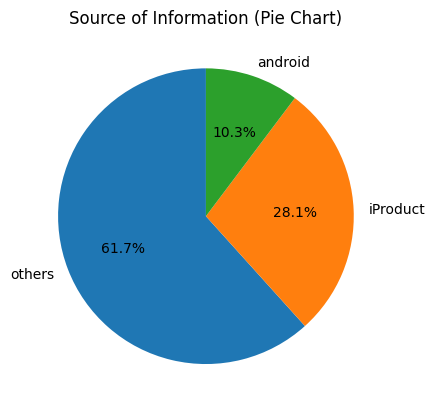

In [17]:
plt.figure()  # Create a new figure for the pie chart
source_counts = df['source'].value_counts()
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Source of Information (Pie Chart)")

plt.show()

There are numerous reviews lacking proper sources, and there is a notable lack of relevance to the data, which should ideally be accompanied by credible sources.

In [18]:
positive_df = df.loc[df['review']=='Positive emotion', :]
negative_df = df.loc[df['review']=='Negative emotion', :]
neutral_df = df.loc[df['review']=='Neutral', :]

<Axes: title={'center': 'positive reviews wrt source'}, xlabel='source'>

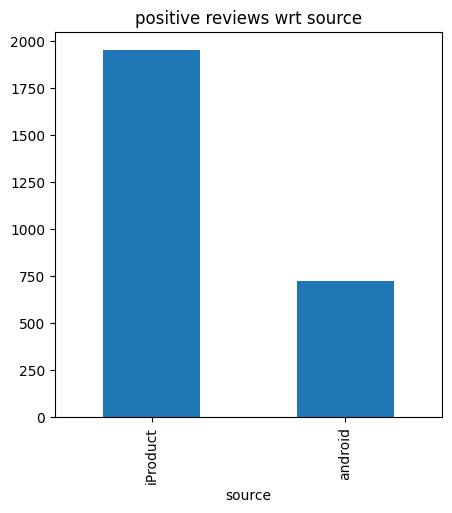

In [19]:
positive_df['source'].value_counts().plot(kind='bar',title="positive reviews wrt source",figsize=(5,5))

<Axes: title={'center': 'Negative reviews wrt source'}, xlabel='source'>

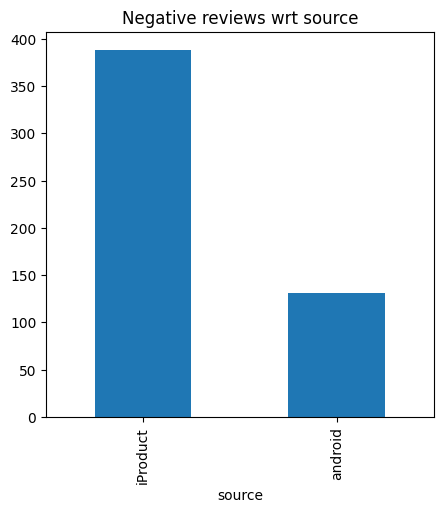

In [20]:
negative_df['source'].value_counts().plot(kind='bar',title="Negative reviews wrt source",figsize=(5,5))

There is a considerable volume of both positive and negative reviews for Apple products when compared to Android products. However, the ratio of positive to negative reviews is more favorable for Android products, indicating a well-balanced distribution of positive and negative sentiments compared to Apple products.

<Axes: title={'center': 'Neutral reviews wrt source'}, xlabel='source'>

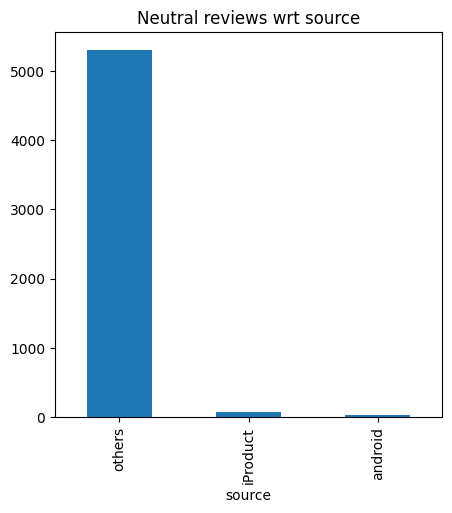

In [21]:
neutral_df['source'].value_counts().plot(kind='bar',title="Neutral reviews wrt source",figsize=(5,5))

Most of the neutral reviews are observed to originate from regions without proper sources, and a significant portion of these reviews lacks relevance to the rest of the dataset.

## Text Pre-Processing

In [22]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm, tqdm_notebook

In [23]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def preprocess(raw_text, flag):
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    sentence = sentence.lower()
    tokens = sentence.split()              
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
        
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [24]:
tqdm.pandas()
temp_df = df['text'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 8588/8588 [00:48<00:00, 176.59it/s]


0   1
0  wesley g iphone hr tweeting rise austin dead n...  13
1  jessedee know fludapp awesome ipad iphone app ...  15
2                swonderlin wait ipad also sale sxsw   6
3  sxsw hope year festival crashy year iphone app...   9
4  sxtxstate great stuff fri sxsw marissa mayer g...  17

In [25]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']
df = pd.concat([df, temp_df], axis=1)
df_cleaned = df[['clean_text_stem','source','review']] 

In [27]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


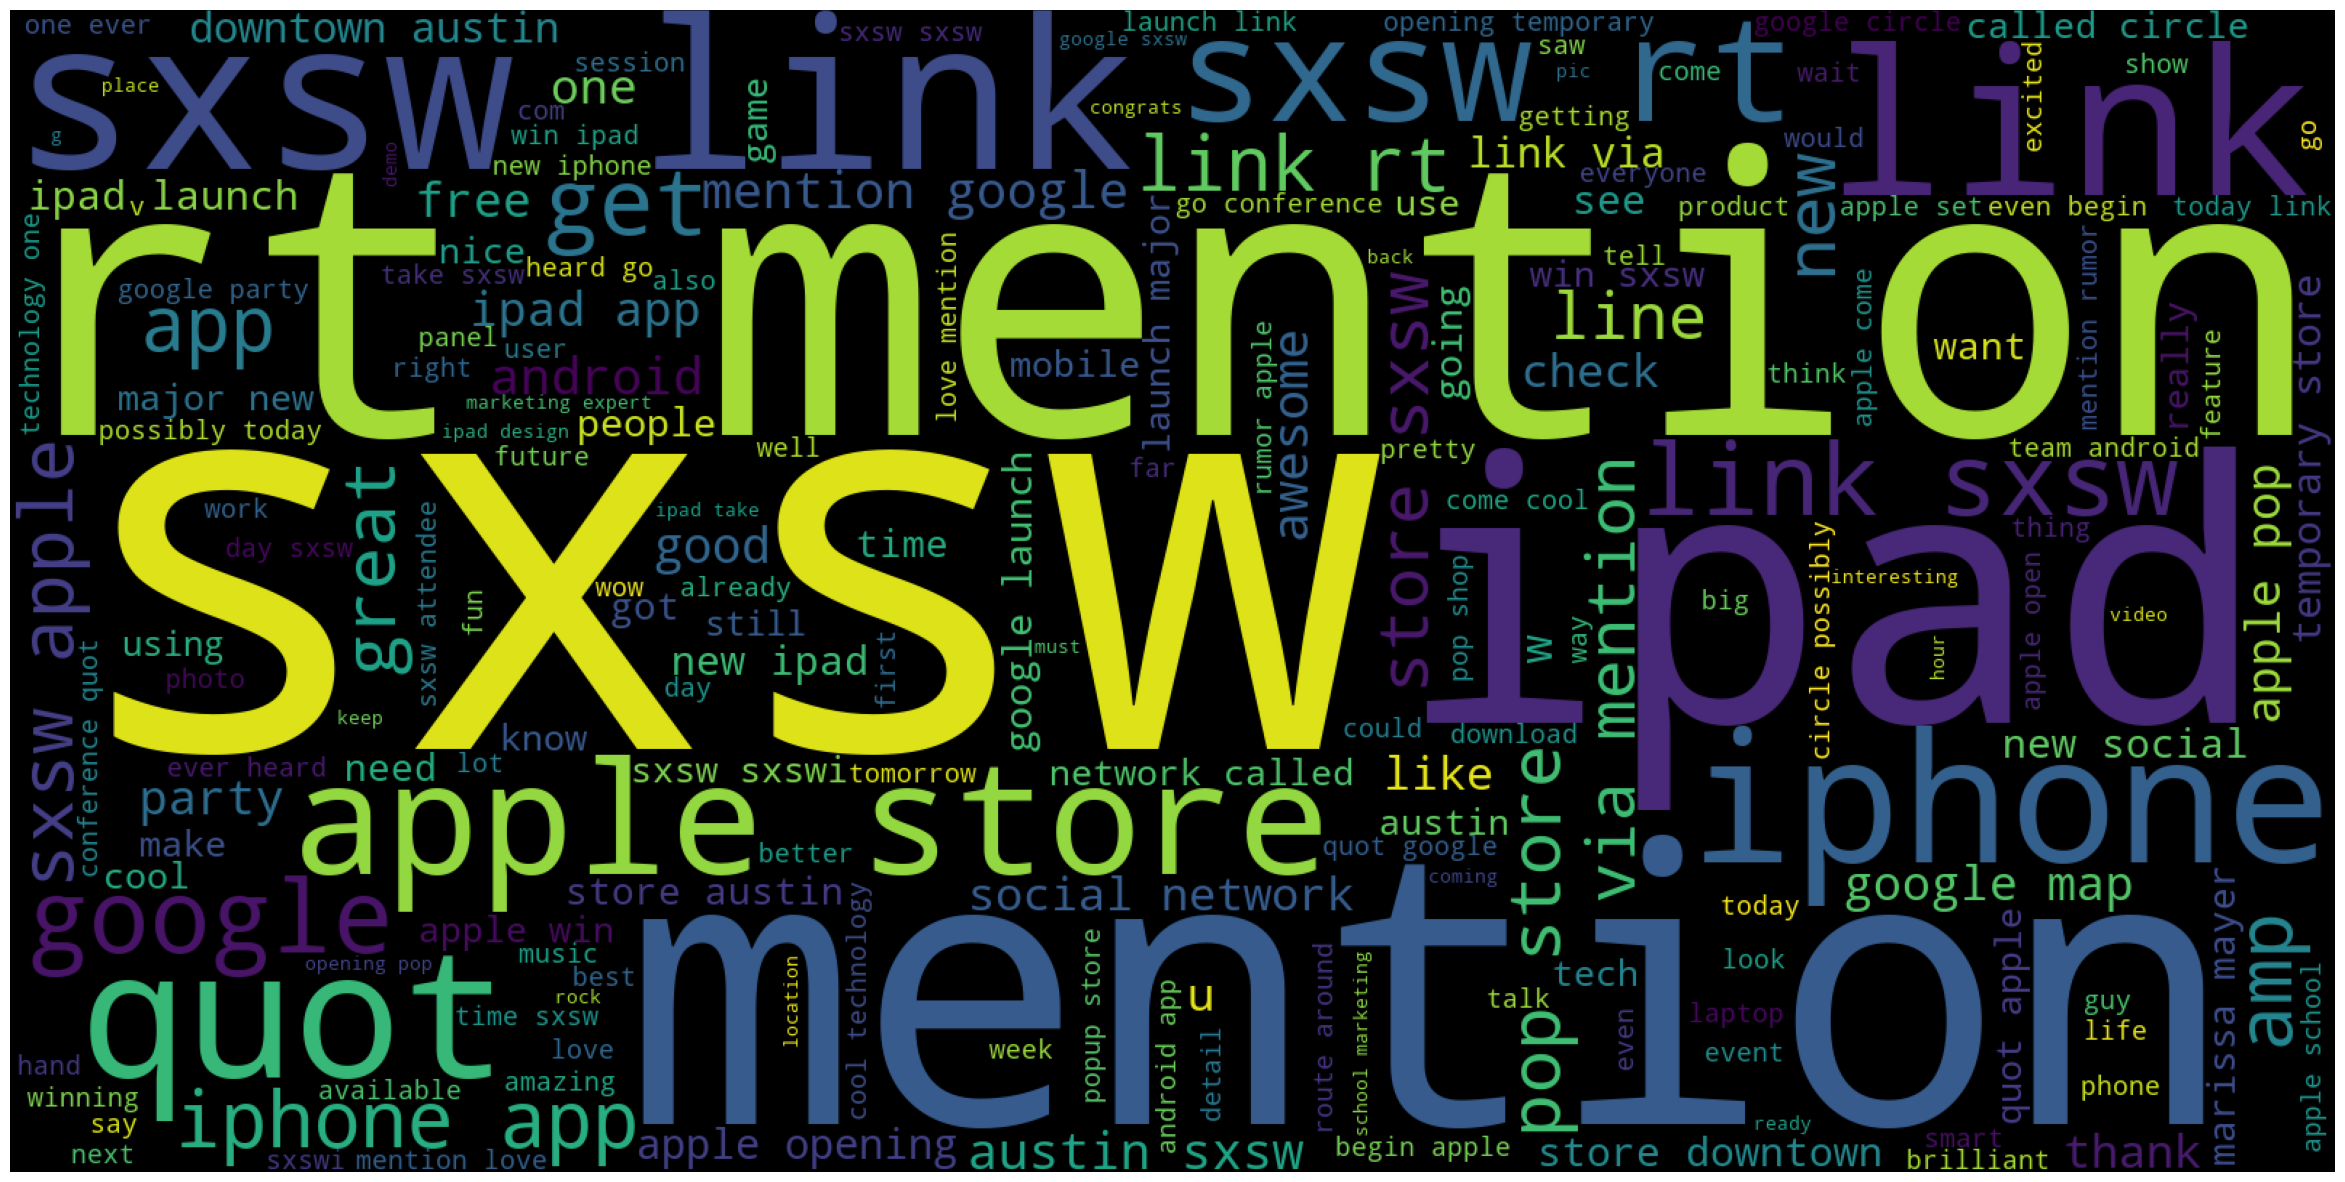

In [32]:
from wordcloud import WordCloud
# Positive Emotion

positive_df = df.loc[df['review']=='Positive emotion', :]

words = ' '.join(positive_df['clean_text_stem'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])



positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

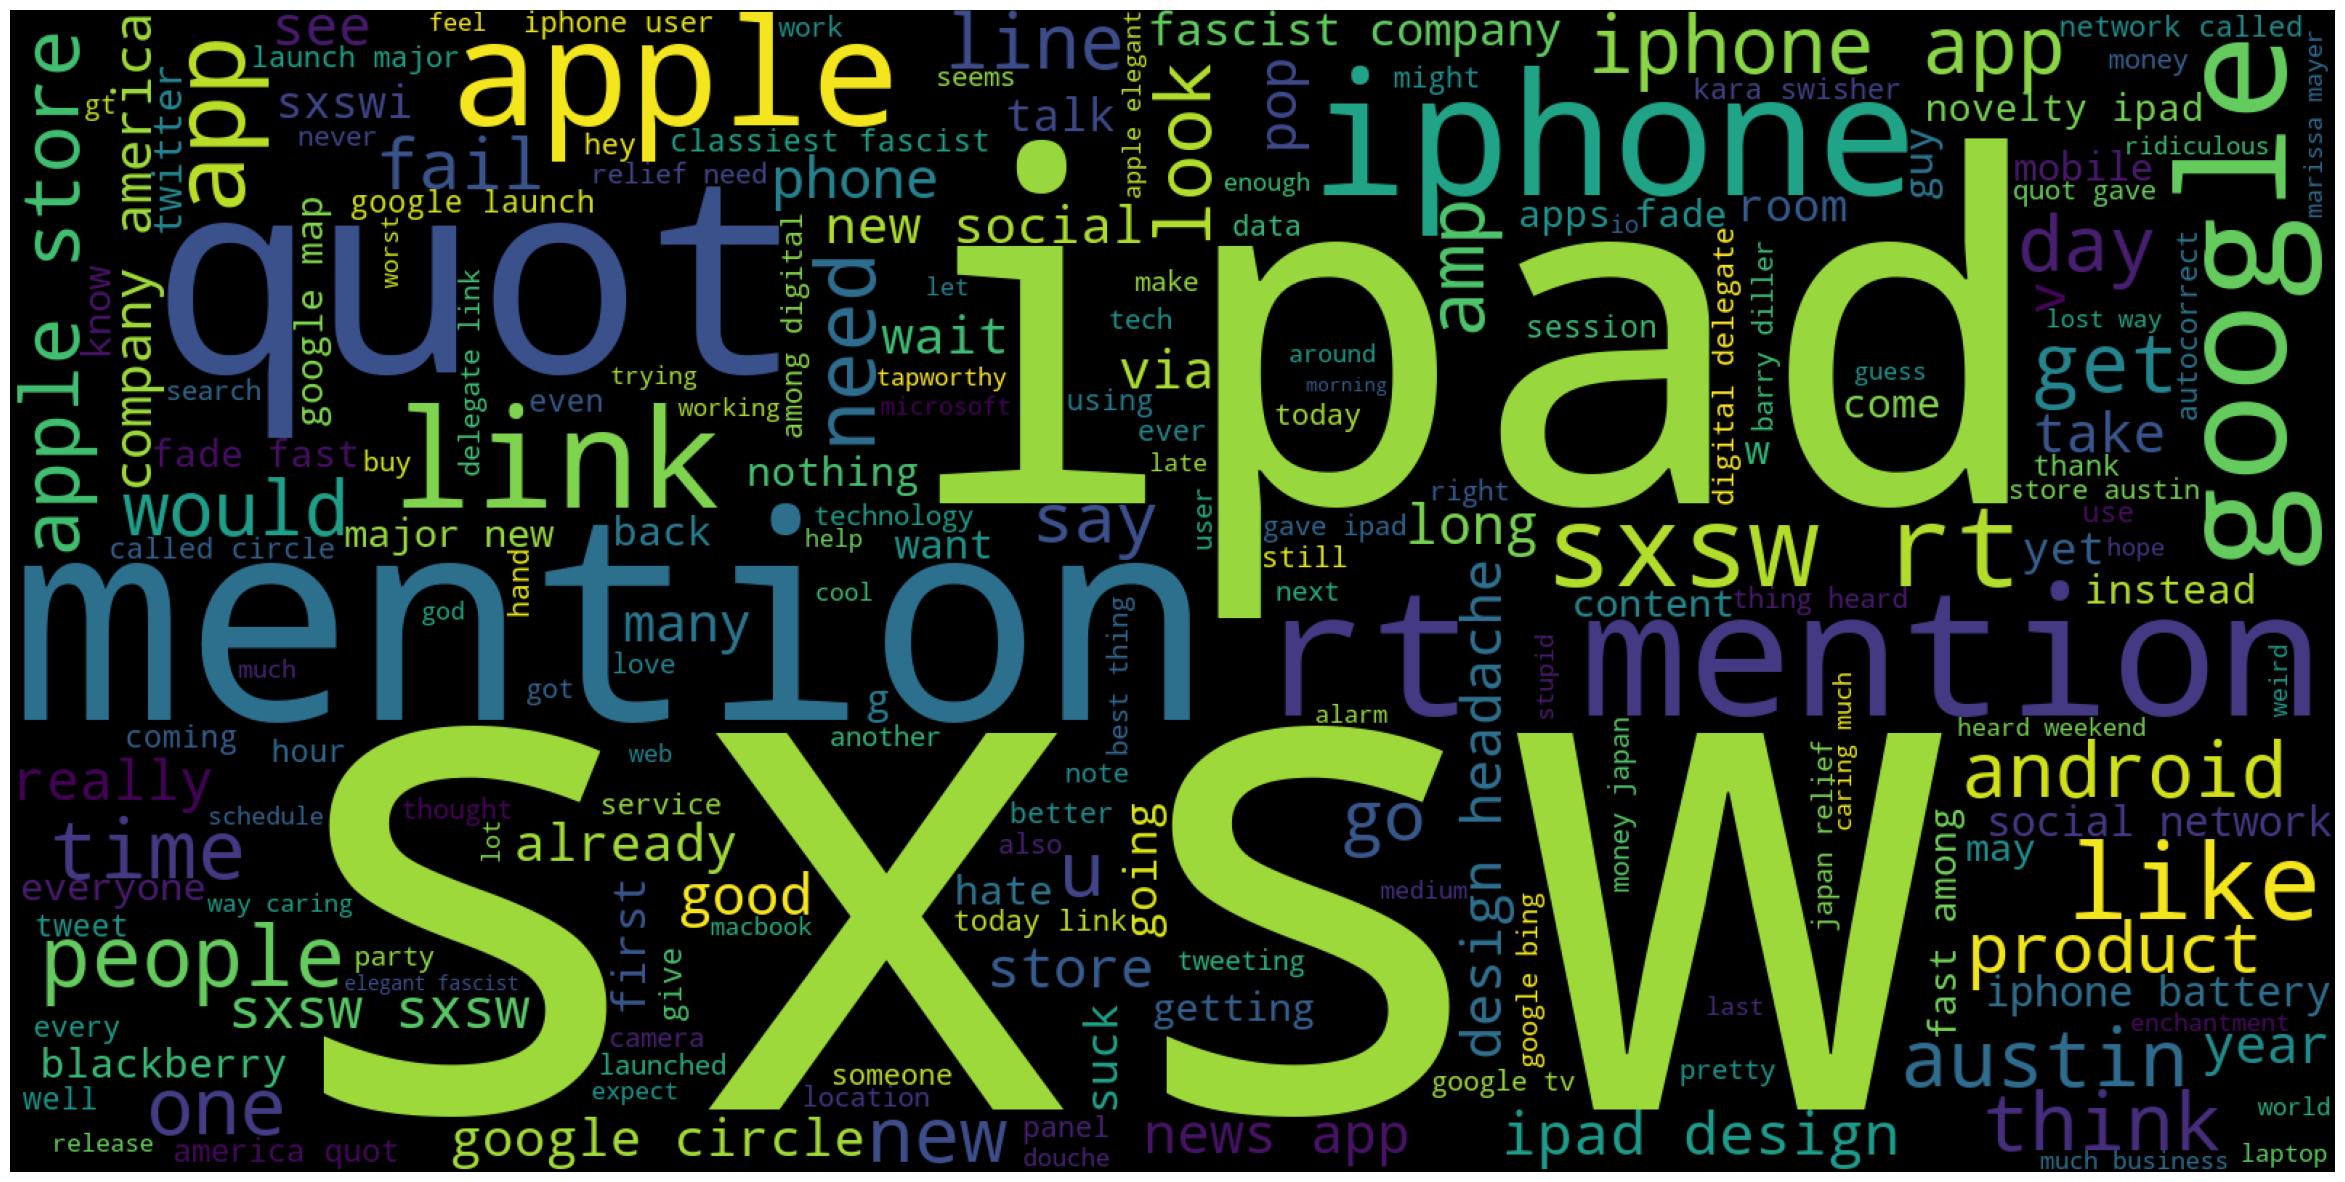

In [33]:
# Negative Emotion

negative_df = df.loc[df['review']=='Negative emotion', :]

words = ' '.join(negative_df['clean_text_stem'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])



negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

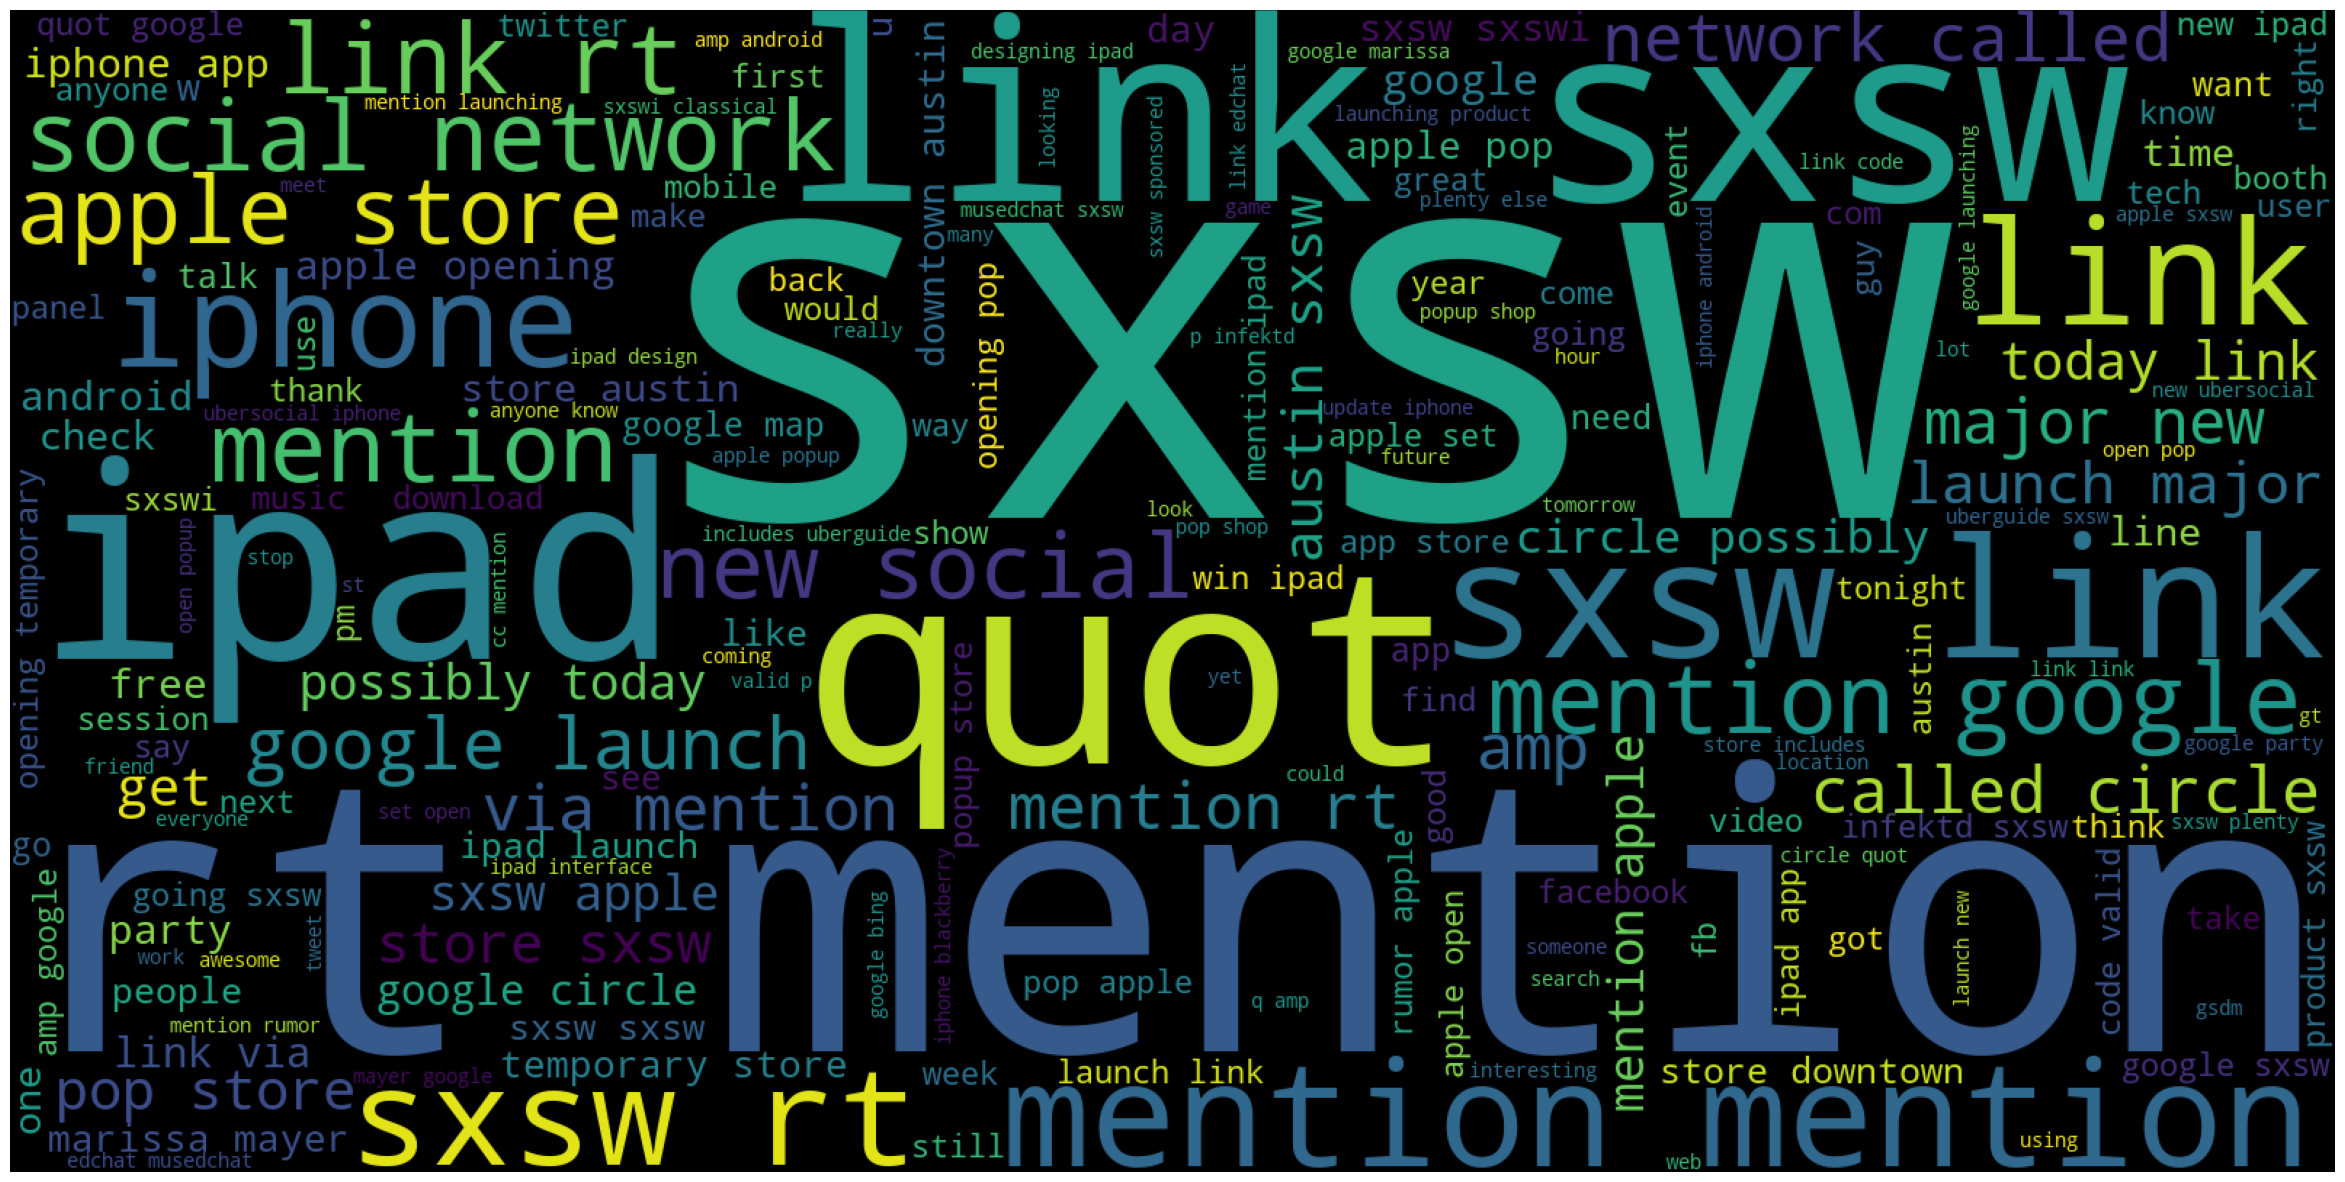

In [34]:
# Neutral Emotion 

neutral_df = df.loc[df['review']=='Neutral', :]

words = ' '.join(neutral_df['clean_text_stem'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])


neutral_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(30,20))
plt.imshow(neutral_wordcloud)
plt.axis('off')
plt.show()

## Data Augmentation

In [35]:
!pip install nlpaug


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import nlpaug.augmenter.word as naw
from tqdm import tqdm
from sklearn.utils import shuffle

aug_w2v = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert")

In [41]:
pr=0.2
samples=1000
aug_w2v.aug_p=pr
new_text=[]

##selecting the minority class samples
df_n=df_cleaned[df_cleaned.review == 'Negative emotion'].reset_index(drop=True)

## data augmentation loop
for i in tqdm(np.random.randint(0,len(df_n),samples)):

        text = df_n.iloc[i]['clean_text_stem']
        augmented_text = aug_w2v.augment(text)
        new_text.append(augmented_text)


## dataframe
new=pd.DataFrame({'clean_text_stem':new_text, 'source' : 'others' ,'review': 'Negative emotion'})
df = shuffle(pd.concat([df_cleaned, new], ignore_index=True))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:18<00:00,  1.79it/s]


<Axes: xlabel='review', ylabel='count'>

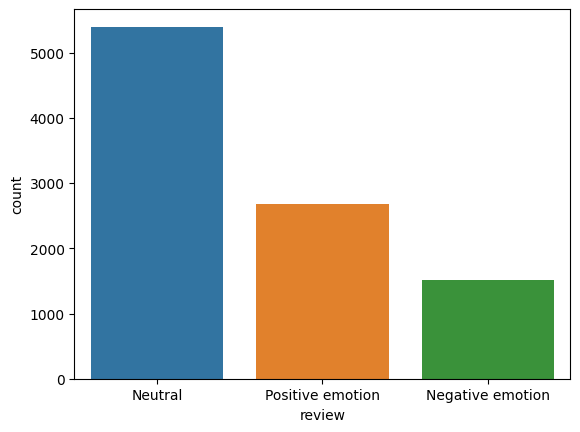

In [42]:
# After Data-Balancing

sns.countplot(x='review', data=df)

In [75]:
df.to_csv('Train_Balanced_Cleaned.csv', index=False)

## Pre-Processing Test data

In [71]:
test_data = pd.read_csv("F:\Internships Assignments\Wysa\raw_test.csv")
test_data.columns=['text']
test_data = test_data['text'].progress_apply(lambda x: preprocess(x, 'lemma'))
test_data_cleaned = test_data[[0]]
test_data_cleaned.columns = ['clean_text_stem']

100%|███████████████████████████████████████████████████████████████████████████████| 504/504 [00:02<00:00, 209.94it/s]


In [73]:
test_data_cleaned.to_csv('Test_Balanced_Cleaned.csv', index=False)

In [78]:
df['source'].value_counts()

source
others      6297
iProduct    2409
android      882
Name: count, dtype: int64